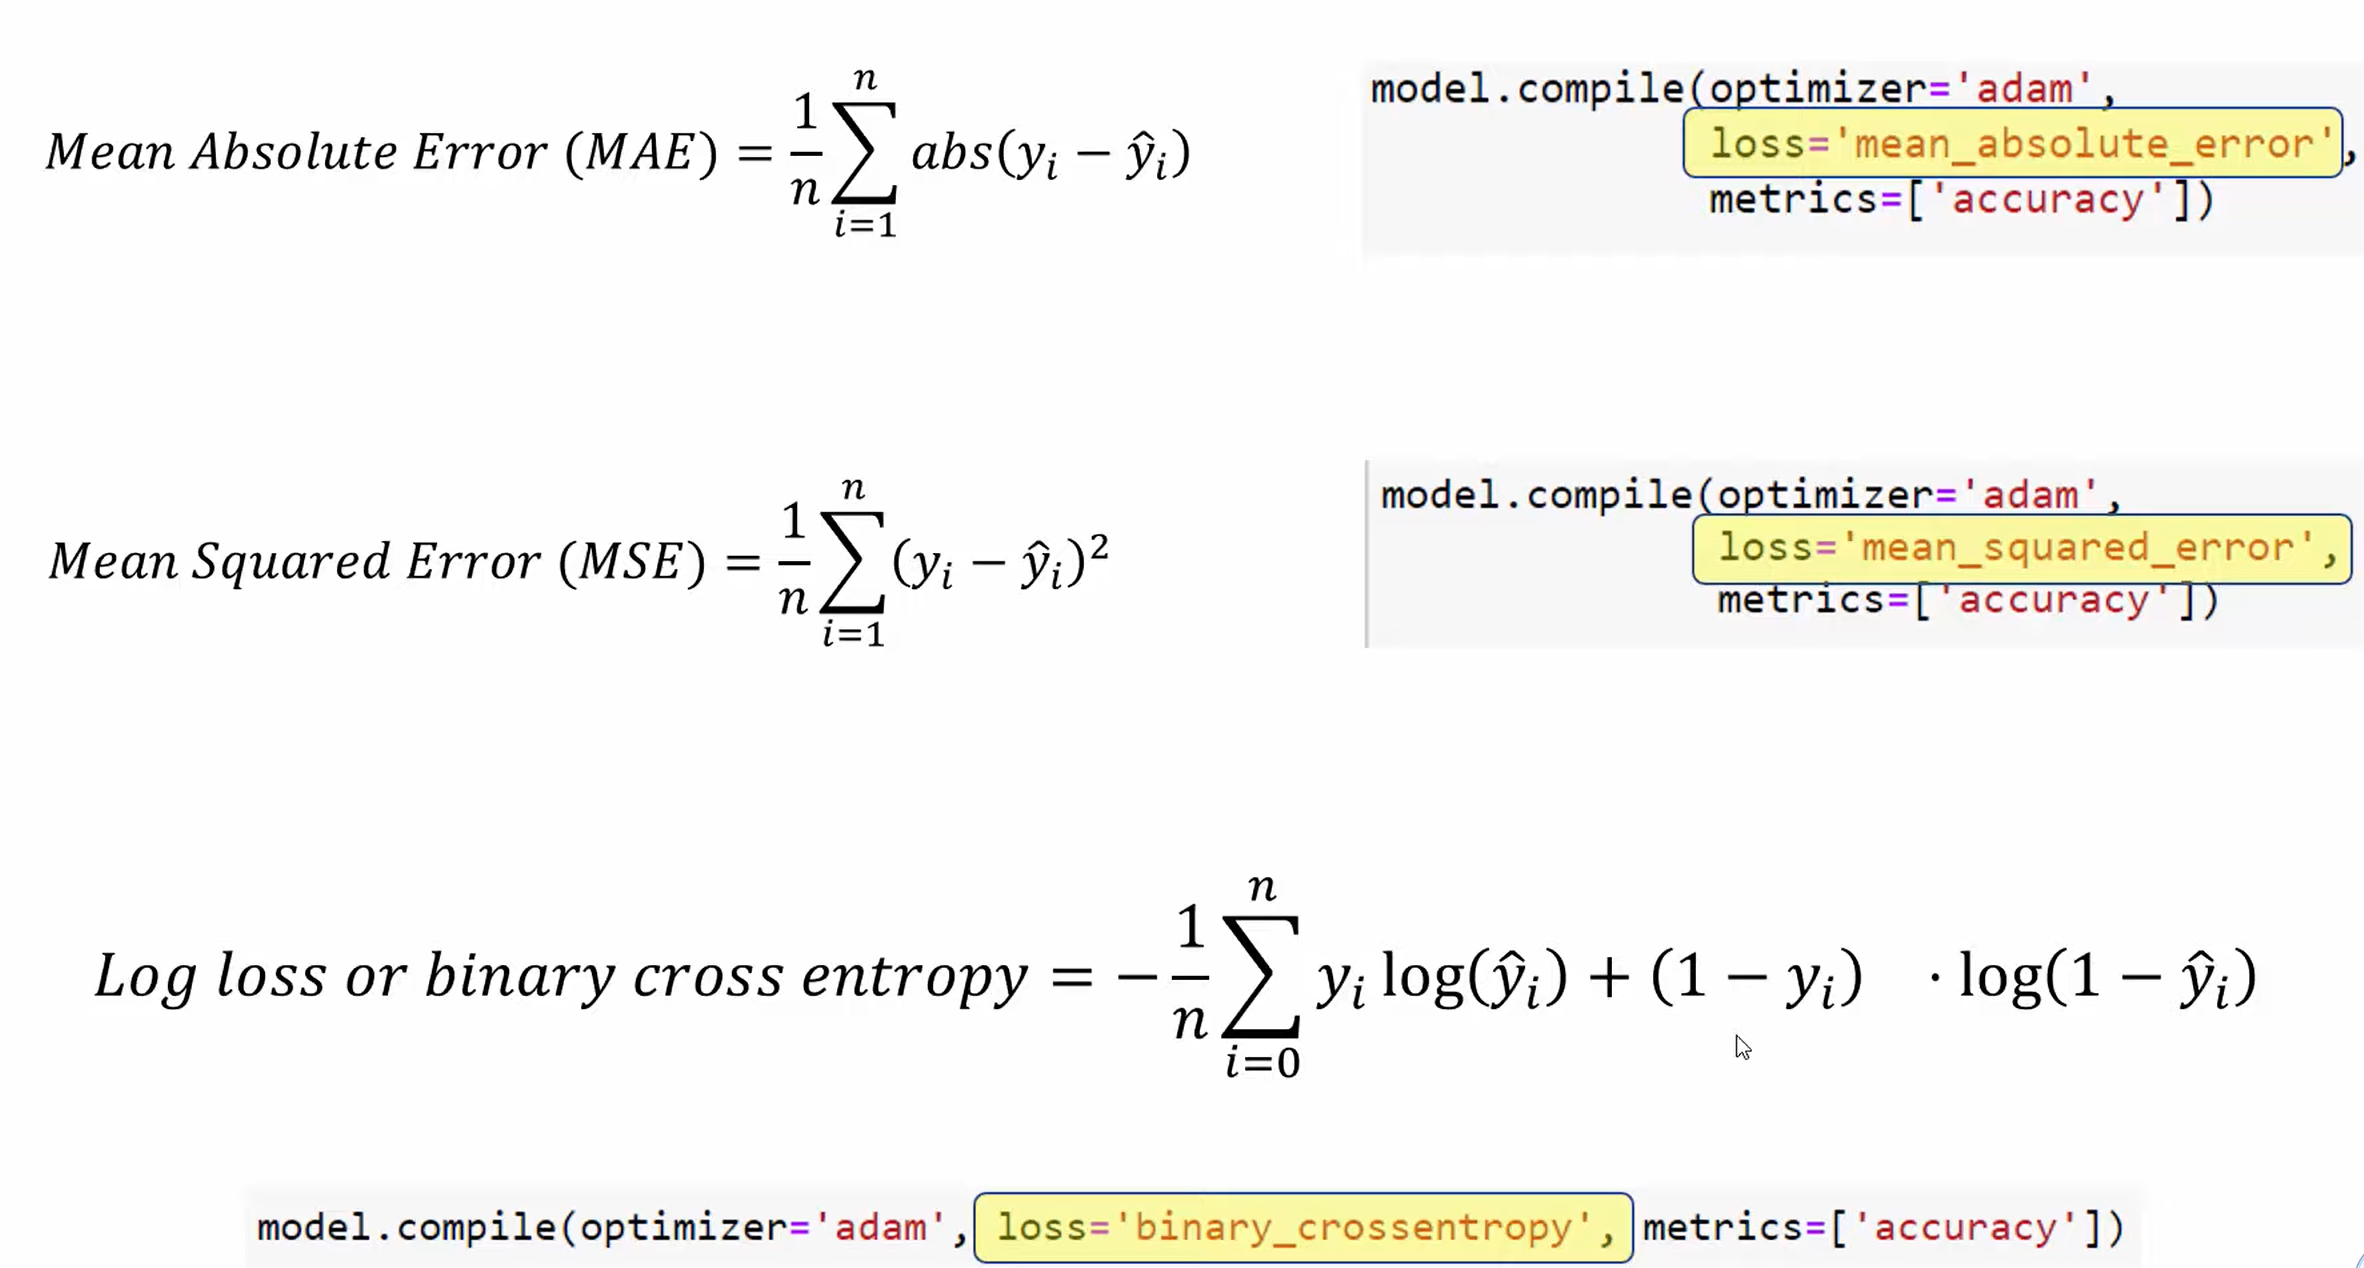

Practically, for logistic regression problem we use log loss or binrary cross entrpoy.

https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c

In [1]:
import numpy as np

### **Implement Mean Absolute Error**

MAE is just the difference between the actual values and the predicted value.

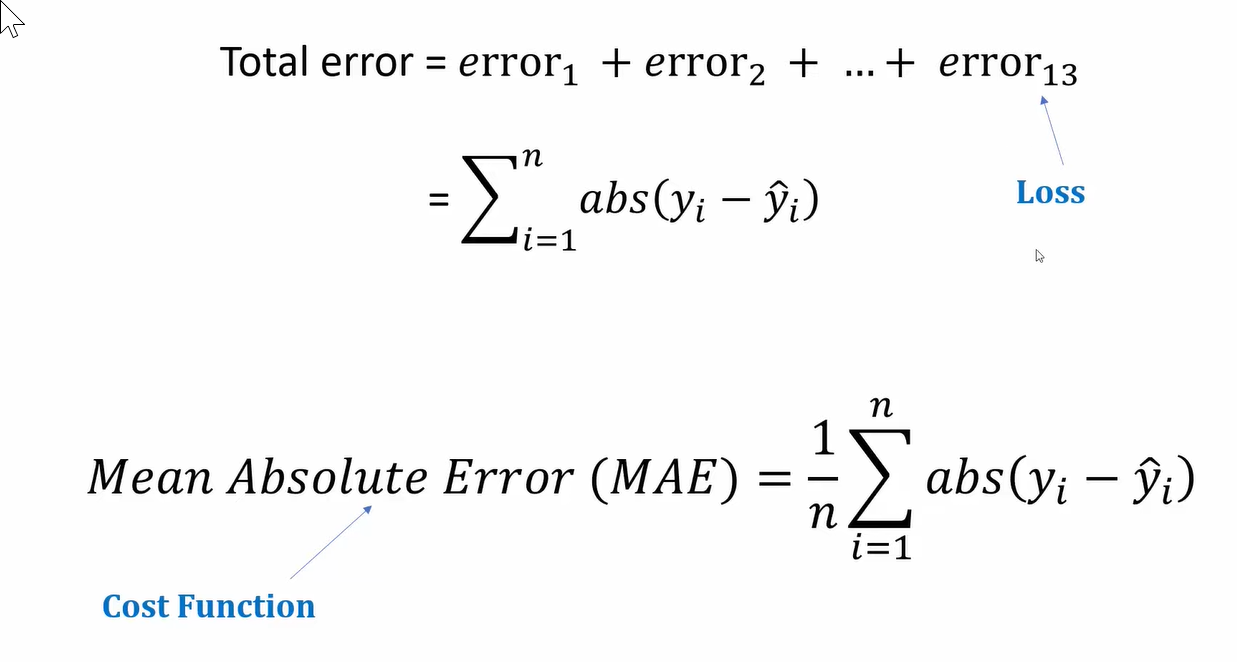

**Epoch**

Passing all the training samples to our model once is called an epoch. 

In [2]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

In [11]:
def mae(y_true,y_predicted):
    total_error = 0
    for yt, yp in zip(y_true,y_predicted):
        total_error += abs(yt-yp)
    print('Total error:',total_error)
    mae = total_error/len(y_true)
    print('MAE:',mae)

In [10]:
mae(y_true,y_predicted)

Total error: 2.5
MAE: 0.5


Implement same thing using numpy in much easier way

In [12]:
np.abs(y_true-y_predicted)

array([0.7, 0.3, 1. , 0. , 0.5])

In [14]:
np.sum(np.abs(y_true-y_predicted))

2.5

In [13]:
np.mean(np.abs(y_true-y_predicted))

0.5

### **Implement Log Loss or Binary Cross Entropy**

In [15]:
np.log([0])

C:\Users\ebrah\AppData\Local\Temp\ipykernel_10928\262464415.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0])


array([-inf])

Converting all zeros to a values very close to zero and converting all ones to a values very close to one in our Y predicted array

In [16]:
epsilon = 1e-15

In [17]:
np.log([1e-15])

array([-34.53877639])

In [18]:
y_predicted

array([1, 1, 0, 0, 1])

In [19]:
y_predicted_new = [max(i,epsilon) for i in y_predicted]
y_predicted_new

[1, 1, 1e-15, 1e-15, 1]

In [20]:
1-epsilon

0.999999999999999

In [21]:
y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
y_predicted_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [22]:
y_predicted_new = np.array(y_predicted_new)

In [23]:
np.log(y_predicted_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [24]:
log_loss = -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))
print('log loss:', log_loss)

log loss: 17.2696280766844


In [25]:
def log_loss(y_true, y_predicted):
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [26]:
log_loss(y_true, y_predicted)

17.2696280766844

### **Mean Square Error**

In [27]:
import numpy as np

y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

In [28]:
def mse(y_true, y_predicted):
    total_error = 0
    for yt, yp in zip(y_true, y_predicted):
        total_error += (yt-yp)**2
    print("Total Squared Error:",total_error)
    mse = total_error/len(y_true)
    print("Mean Squared Error:",mse)
    return mse

In [29]:
mse(y_true, y_predicted)

Total Squared Error: 1.83
Mean Squared Error: 0.366


0.366

In [32]:
print('MSE:',np.mean(np.square(y_true-y_predicted)))

MSE: 0.366
